# Doc2Vec

A continuation of using neural networks to help predict company embeddings, we now explore doc2vec.

This works much in the same was as Word2Vec, except on input we also specify which document/filing a given word has come from, resulting in ready made document vectors for us.

## Lets get to the code!

First we need to load in the functions and data:

In [1]:
import os
import json
import pandas as pd
import numpy as np
import sys
sys.path.insert(0, '..')
%load_ext autoreload
%autoreload 2
%aimport std_func


# Hide warnings
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("../data/preprocessed.csv")

Thanks to the gensim package, it's quite easy to implement doc2vec.

In [2]:
from gensim.models import doc2vec
from collections import namedtuple

docs = []
analyzedDocument = namedtuple('AnalyzedDocument', 'words tags')
for i, text in enumerate(df["coDescription_stopwords"]):
    words = text.lower().split()
    tags = [i]
    docs.append(analyzedDocument(words, tags))

model = doc2vec.Doc2Vec(docs, vector_size = 100, window = 10, min_count = 1, workers = 4)

Like Word2Vec, we now also have a document vector matrix. We specified only 100 dimensions due to computational limitations, and the fact anymore most likely would not have helped. (Tune the hyper-parameter later)

And here we have the vectors for each company.

In [3]:
# Get the vectors

doc_vec_2 = pd.DataFrame([model.dv[doc] for doc in np.arange(0,len(docs))])
doc_vec_2.head()

0         1         2         3         4         5         6   \
0  0.063332 -1.709820 -0.817745  1.252686  1.930027 -0.611312 -0.949931   
1 -0.431390 -1.686111 -2.315252  1.239316  0.488662 -0.503453 -0.806613   
2 -2.424892 -0.733826 -1.753071  2.321456  1.174774 -0.868817  0.047467   
3 -0.880349 -1.734211 -0.542521  1.446852 -0.481555  0.170985 -0.929023   
4 -2.455778 -2.277572 -1.119834  3.104382  0.316401 -1.406037 -1.130884   

         7         8         9   ...        90        91        92        93  \
0 -1.146779 -2.161063 -0.755814  ...  1.906439 -2.936009 -3.017195  0.092107   
1 -2.312331 -1.160197  0.468927  ... -0.990687 -1.456107 -2.988537 -0.468076   
2 -2.145324 -2.372477 -0.426756  ...  1.657278 -1.282739 -3.361549  1.451141   
3 -0.328606 -1.395277  0.170979  ... -0.147050 -2.999112 -1.794707 -0.417698   
4  3.506344 -1.293062  3.075027  ... -1.935369  0.616803 -2.294412  2.131323   

         94        95        96        97        98        99  
0 -0.298214 -1.640442 -0.350729  2.537851 -0.978226 -2.010749  
1  0.241949 -1.018510  0.141568  0.658016  0.097364 -1.748869  
2 -0.100289 -0.445972 -2.515524  0.458805  1.589886 -3.898726  
3 -1.290583  0.013150 -0.065779  0.529902  1.120956 -1.252824  
4  3.369853  0.869642 -1.792449  0.972653 -2.242157 -3.445989  

[5 rows x 100 columns]

## Plotting the results

Here are the results of the doc2vec semantic company embedding after dimensionality reduction using PCA.

In [4]:
plot_pca = std_func.pca_visualize_2d(doc_vec_2, df.loc[:,["name","SIC_desc"]])

In [5]:
std_func.pca_visualize_3d(plot_pca)

These look great! It seems doc2vec was able to create embeddings for our companies that separated them by industry very well, even after the PCA dimensionality reduction.

## Performance Evaluation

                                                      precision    recall  f1-score   support

Prepackaged Software (mass reproduction of software)       0.96      0.88      0.92        80
                     Crude Petroleum and Natural Gas       0.94      0.97      0.95       208
                         Pharmaceutical Preparations       0.81      0.86      0.84        80
                       Real Estate Investment Trusts       0.90      0.91      0.91       191
         State Commercial Banks (commercial banking)       0.98      0.94      0.96       116

                                            accuracy                           0.92       675
                                           macro avg       0.92      0.91      0.91       675
                                        weighted avg       0.92      0.92      0.92       675



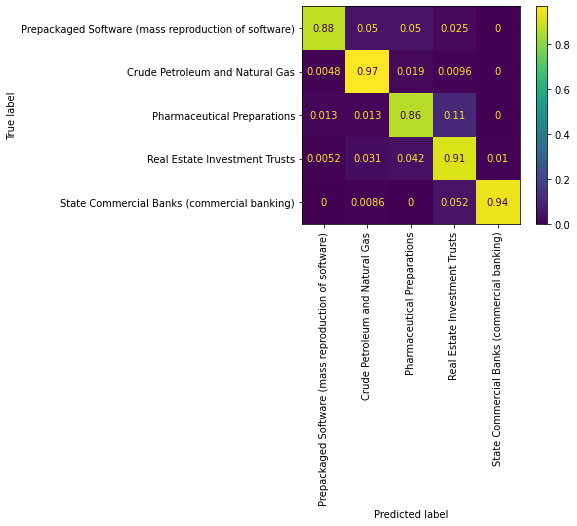

In [7]:
conf_mat = std_func.conf_mat(doc_vec_2,df)

In [10]:
dot_product_df, accuracy, cm = std_func.dot_product(doc_vec_2,df)
from sklearn.metrics import classification_report
print(classification_report(dot_product_df["y_true"], dot_product_df["y_pred"], target_names=df["SIC_desc"].unique()))

                                                      precision    recall  f1-score   support

Prepackaged Software (mass reproduction of software)       0.96      0.88      0.92        80
                     Crude Petroleum and Natural Gas       0.94      0.97      0.95       208
                         Pharmaceutical Preparations       0.81      0.86      0.84        80
                       Real Estate Investment Trusts       0.90      0.91      0.91       191
         State Commercial Banks (commercial banking)       0.98      0.94      0.96       116

                                            accuracy                           0.92       675
                                           macro avg       0.92      0.91      0.91       675
                                        weighted avg       0.92      0.92      0.92       675



From the confusion matrix and the classification report, we can conclude that the doc2vec company embedding does a great job at classifying the category of the companies. This is in line with our observations of the PCA plots, as they did a very good job at separating companies in different industries.